In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Camp11_11 = r"C:\Users\Dung\OneDrive\DA Project\Daraz 11.11\Original Data\Top_Selling_Product_Data.csv"
df = pd.read_csv(Camp11_11)

df.head()

,Category,SubCategory,Title,Original Price,Discount Price,Discount,Seller Name,Number of Ratings,Positive Seller Ratings,Ship On Time,Chat Response Rate,Delivery Type,Flagship Store,No. of products to be sold,Sell percentage to increase
0,"Watches, Bags, Jewellery",Kids Bags,Animal Prints Cotton Canvas Children Bags Back...,550,255,54.0,Twenty Twenty,342,85,0,98,Standard Delivery,No,107.84,116
1,"Watches, Bags, Jewellery",Kids Bags,School Bags For Girls Big Capacity Backpack Sh...,1650,725,56.0,AYSHA TRADERS,31,86,0,93,Free Delivery,No,113.79,128
2,"Watches, Bags, Jewellery",Kids Bags,Nylon Animal Children Backpacks Kids Preschool...,350,195,44.0,Shah Wholesale Fashion,13,77,0,57,Free Delivery,No,89.74,80
3,"Watches, Bags, Jewellery",Kids Bags,Backpacks for kids in kindergarten Cute baby b...,1200,749,38.0,Ghoredokanbd,23,93,0,100,Standard Delivery,No,80.11,61
4,"Watches, Bags, Jewellery",Kids Bags,kids bag toddler backpack with leash messenger...,350,286,18.0,Darun Online Shop,3,90,0,100,Free Delivery,No,61.19,23


In [4]:
# Data cleanning
null = df.isnull().sum()
print(null)

df.dtypes

Category                       0
SubCategory                    0
Title                          0
Original Price                 0
Discount Price                 0
Discount                       0
Seller Name                    0
Number of Ratings              0
Positive Seller Ratings        0
Ship On Time                   0
Chat Response Rate             0
Delivery Type                  0
Flagship Store                 0
No. of products to be sold     0
Sell percentage to increase    0
dtype: int64


Category                        object
SubCategory                     object
Title                           object
Original Price                   int64
Discount Price                   int64
Discount                       float64
Seller Name                     object
Number of Ratings                int64
Positive Seller Ratings          int64
Ship On Time                     int64
Chat Response Rate               int64
Delivery Type                   object
Flagship Store                  object
No. of products to be sold     float64
Sell percentage to increase      int64
dtype: object

In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [14]:
# Feature Engineering

df["Revenue before Discount"] = df["Original Price"] * 50
df["Revenue after Discount"] = df["No. of products to be sold"] * df["Discount Price"]

df['Revenue Impact'] = (df['Revenue after Discount'] - df['Revenue before Discount'])/df['Revenue before Discount'] * 100

# Save the clean data
df.to_csv(r"C:\Users\Dung\OneDrive\DA Project\Daraz 11.11\Camp 11.11.csv", index=False)

In [12]:
# EDA
df.describe()

,Original Price,Discount Price,Discount,Number of Ratings,Positive Seller Ratings,Ship On Time,Chat Response Rate,No. of products to be sold,Sell percentage to increase,Revenue before Discount,Revenue after Discount,Revenue Impact
count,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,1.125800e+04,1.125800e+04,11258.000000
mean,6421.506751,5245.621336,34.879614,94.800942,79.512436,33.051075,88.990318,90.037116,80.535797,3.210753e+05,3.210758e+05,0.000024
std,21568.893338,18899.637456,21.521939,323.593841,22.801496,47.040767,22.060892,52.656583,105.323575,1.078445e+06,1.078443e+06,0.003746
min,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-62.000000,2.500000e+02,2.500000e+02,-0.009770
25%,280.000000,155.000000,17.000000,1.000000,81.250000,0.000000,91.000000,60.000000,20.000000,1.400000e+04,1.400005e+04,-0.002667
50%,650.000000,360.000000,35.000000,13.000000,86.000000,0.000000,97.000000,76.415000,53.000000,3.250000e+04,3.250000e+04,0.000000
75%,1800.000000,1139.750000,51.000000,64.000000,89.000000,100.000000,100.000000,102.460000,105.000000,9.000000e+04,8.999405e+04,0.002549
max,479900.000000,479900.000000,98.000000,11914.000000,100.000000,100.000000,100.000000,2495.450000,4891.000000,2.399500e+07,2.399500e+07,0.009741


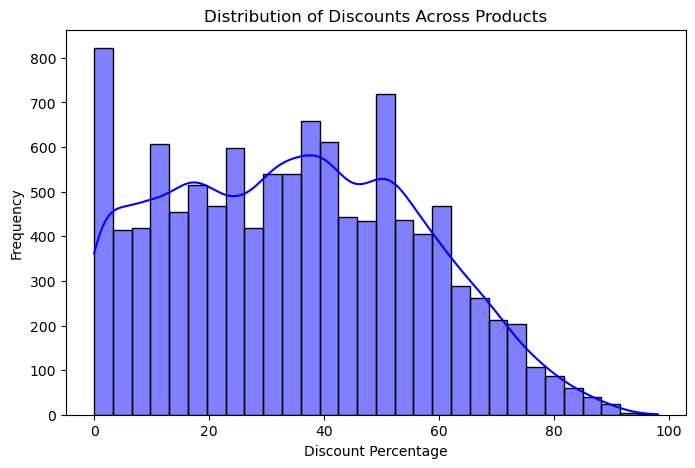

In [26]:
# 1: Distribution of Discount
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount'], bins=30, kde=True, color='blue')
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Discounts Across Products")
plt.show()

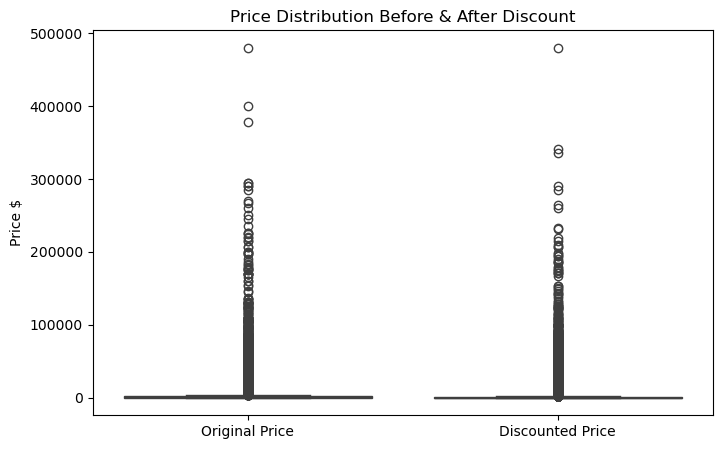

In [32]:
# 2: Boxplot of Prices Before & After Discount 
plt.figure(figsize=(8,5))
sns.boxplot(data = df[['Original Price','Discount Price']])
plt.ylabel('Price $')
plt.title("Price Distribution Before & After Discount")
plt.xticks(ticks=[0, 1], labels=["Original Price", "Discounted Price"])
plt.show()

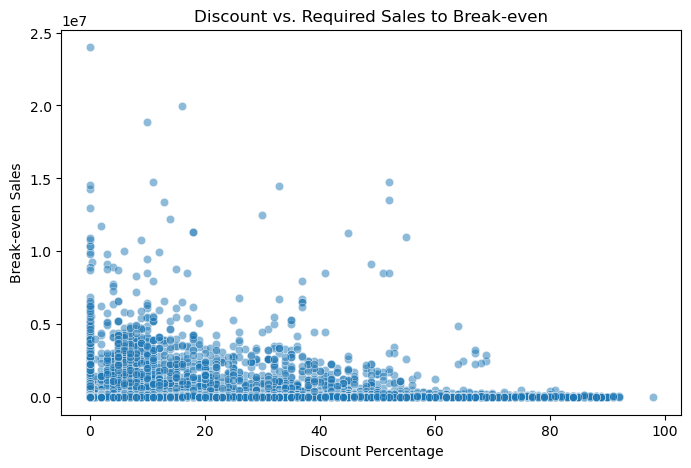

In [28]:
# 3: Scatter Plot - Discount % vs. No. of Products to be Sold
plt.figure(figsize = (8,5))
sns.scatterplot(x=df['Discount'], y=df['Revenue after Discount'], alpha = 0.5)
plt.xlabel("Discount Percentage")
plt.ylabel("Break-even Sales")
plt.title("Discount vs. Required Sales to Break-even")
plt.show()

In [30]:
# ANOVA: Does a Higher Discount Significantly Increase Sales?

from scipy.stats import ttest_ind, f_oneway

low = df[df['Discount'] <= 20]['Revenue after Discount']
medium = df[(df['Discount'] > 20) & (df['Discount'] <= 50)]['Revenue after Discount']
high = df[df['Discount'] > 50]['Revenue after Discount']

anova_stat, anova_p = f_oneway(low, medium, high)
print(f"ANOVA Results: F-statistic = {anova_stat}, p-value = {anova_p}")

ANOVA Results: F-statistic = 345.1327716762809, p-value = 3.368098835425772e-146


In [16]:
# Multiple Regression Analysis 

import statsmodels.api as sm

# Clean 'Flagship Store' column (convert Yes/No to binary 1/0)
df['Flagship Store'] = df['Flagship Store'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables ('Category' & 'Delivery Type')
df_encoded = pd.get_dummies(df, columns=['Category', 'Delivery Type'], drop_first=True)

# Define independent variables (predictors)
X = df_encoded[['Discount', 'Number of Ratings', 'Positive Seller Ratings',
                'Ship On Time', 'Chat Response Rate', 'Flagship Store'] + 
               [col for col in df_encoded.columns if col.startswith('Category_') or col.startswith('Delivery Type_')]]

# Define dependent variable (target)
y = df_encoded['Revenue after Discount']

# Drop missing values in y
df_encoded = df_encoded.dropna(subset=['Revenue after Discount'])
X = X.loc[df_encoded.index]
y = y.loc[df_encoded.index]

# Convert all columns in X to float (fixes Pandas dtype issue)
X = X.astype(float)

# Ensure X and y are aligned
X, y = X.align(y, join='inner', axis=0)

# Add constant for intercept
X = sm.add_constant(X)

# Run Multiple Linear Regression
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Revenue after Discount   R-squared:                       0.240
Model:                                OLS   Adj. R-squared:                  0.239
Method:                     Least Squares   F-statistic:                     254.0
Date:                    Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                            01:08:20   Log-Likelihood:            -1.9531e+05
No. Observations:                   12907   AIC:                         3.907e+05
Df Residuals:                       12890   BIC:                         3.908e+05
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------